In [1]:
using Plots, LaTeXStrings

In [2]:
const Lambda_T = 70.0 / 197.33 # 单位: fm^-1 (假设原文 Lambda 为 70 MeV)
const Nf = 3 # Flavor number

function alpha_S(T, mu)
    # 定义 Log 的参数 L，避免重复书写和计算，减少出错概率
    # 公式中是对数内的项： (T/Lambda_T) * sqrt(1 + (mu/(pi*T))^2)
    # 注意：T 和 mu 的单位必须与 Lambda_T 一致 (推荐都用 fm^-1)
    
    L_arg = (T / Lambda_T) * sqrt(1 + (mu / (pi * T))^2)
    L = log(L_arg)
    
    # 按照公式 (54)
    beta0 = 33 - 2 * Nf
    beta1 = 6 * (153 - 19 * Nf) # 注意系数: 3 * (...) / (...)^2，这里为了清晰拆开写
    
    term1 = (6 * pi) / (beta0 * L)
    
    # 公式第二部分: 1 - ...
    # 原公式中分子系数是 3*(153 - 19Nf)，分母是 (33 - 2Nf)^2
    factor = (3 * (153 - 19 * Nf)) / (beta0^2)
    
    term2 = 1 - factor * (log(2 * L) / L)
    
    return term1 * term2
end

function tau(T, mu)
    alphas = alpha_S(T, mu)
    
    # 按照公式 (53)
    # 分母 = 5.1 * T * alpha^2 * log(1/alpha) * (1 + 0.12*(2Nf + 1))
    denom = 5.1 * T * alphas^2 * log(1 / alphas) * (1 + 0.12 * (2 * Nf + 1))
    
    return 1 / denom
end

tau (generic function with 1 method)

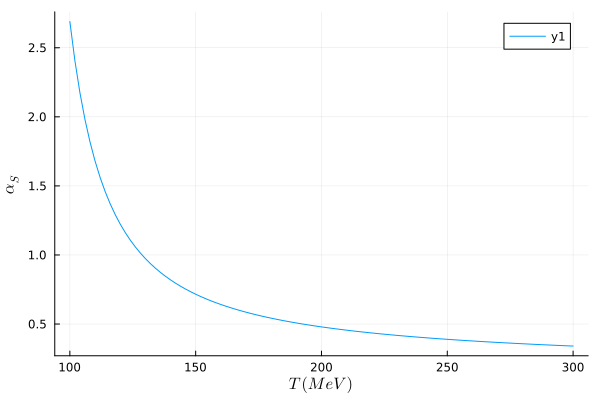

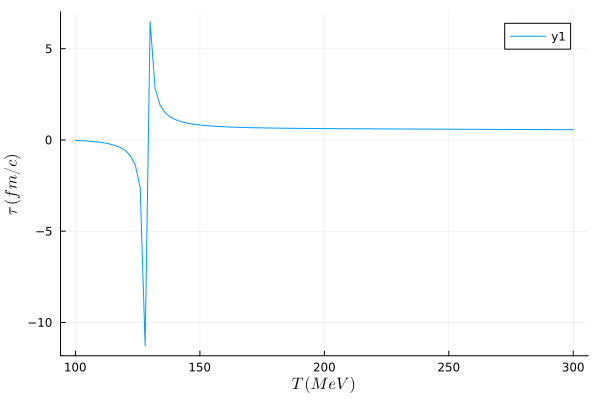

In [18]:
T = 300.0:-2.0:100
muB = 0.0
hc = 197.33 # MeV·fm
taus = similar(T)
alphas = similar(T)
for (i, val) in enumerate(T)
    taus[i] = tau(val / hc, muB / hc)
    alphas[i] = alpha_S(val / hc, muB / hc)
end
p1 = plot(T, alphas, xlabel=L"T\ (MeV)", ylabel=L"\alpha_S")
p2 = plot(T, taus, xlabel=L"T\ (MeV)", ylabel=L"\tau\ (fm/c)")

display(p1)
display(p2)